## Project 2: E-news Express Project 

### Background: 

An online news portal aims to expand its business by acquiring new subscribers. Every visitor to the website takes certain actions based on their interest. The company plans to analyze these interests and wants to determine whether a new feature will be effective or not. Companies often analyze users' responses to two variants of a product to decide which of the two variants is more effective. This experimental technique is known as a/b testing that is used to determine whether a new feature attracts users based on a chosen metric.

Suppose you are hired as a Data Scientist in E-news Express. The design team of the company has created a new landing page. You have been assigned the task to decide whether the new landing page is more effective to gather new subscribers. Suppose you randomly selected 100 users and divided them equally into two groups. The old landing page is served to the first group (control group) and the new landing page is served to the second group (treatment group). Various data about the customers in both groups are collected in 'abtest.csv'. Perform the statistical analysis to answer the following questions using the collected data.

### Objective:

Statistical analysis of business data. Explore the dataset and extract insights from the data. The idea is for you to get comfortable with doing statistical analysis in Python.

You are expected to perform the statistical analysis to answer the following questions:

* Explore the dataset and extract insights using Exploratory Data Analysis.
* Do the users spend more time on the new landing page than the old landing page?
* Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
* Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]
* Is the mean time spent on the new page same for the different language users?
* Consider a significance level of 0.05 for all tests.

### Data Dictionary:

* user_id - This represents the user ID of the person visiting the website.
* group - This represents whether the user belongs to the first group (control) or the second group (treatment).
* landing_page - This represents whether the landing page is new or old.
* time_spent_on_the_page - This represents the time (in minutes) spent by the user on the landing page.
* converted - This represents whether the user gets converted to a subscriber of the news portal or not.
* language_preferred - This represents the language chosen by the user to view the landing page.

Best Practices for Notebook : 

The notebook should be well-documented, with inline comments explaining the functionality of code and markdown cells containing comments on the observations and insights.
The notebook should be run from start to finish in a sequential manner before submission.
It is preferable to remove all warnings and errors before submission.
The notebook should be submitted as an HTML file (.html) and NOT as a notebook file (.ipynb) 

Best Practices for Presentation :

The presentation should be made keeping in mind that the audience will be a business leader like CMO, COO, CFO, or CEO.
The key points in the presentation should be the following
business overview of the problem and solution approach
key findings and insights which are important to make business decisions
key conclusions made on the basis of the statistical analysis
Focus on explaining the takeaways in an easy-to-understand manner.
Copying and pasting from the notebook is not a good idea, and it is better to avoid showing codes unless they are the focal point of your presentation.
The presentation should be submitted as a PDF file (.pdf) and NOT as a .pptx file.


### Import Important Packages

In [111]:
import numpy as np
import pandas as pd 
import seaborn as sns #to plot graphs
import scipy.stats as stats #to use ANOVA test
import matplotlib.pyplot as plt #to plot graphs

### Q1: Exploring Dataset and EDA

In [112]:
df = pd.read_csv('abtest.csv')
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [113]:
df.shape

(100, 6)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


Observations: The 'group','landing_page','converted', and 'language_preferred' columns are categorical. While, 'user_id' and 'time_spent_on_the_page' are numerical.

In [115]:
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

In [116]:
df.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


In [117]:
df.language_preferred.value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

In [118]:
df.converted.value_counts()

yes    54
no     46
Name: converted, dtype: int64

Observations: 
* There are 100 rows and 6 columns
* 'user_id' is int and 'time_spent_on_the_page' is float. The rest are objects.
* There is no missing cell/information
* There are 3 languages, Spanish, French, and English, for the 'landing_page'
* 'time_spent_on_the_page', mean is 5.38 minutes, maximum is 10.71 minutes, minimux is 0.19 minute.

### Exploratory Data Analysis

landing_page
new    6.22
old    4.53
Name: time_spent_on_the_page, dtype: float64


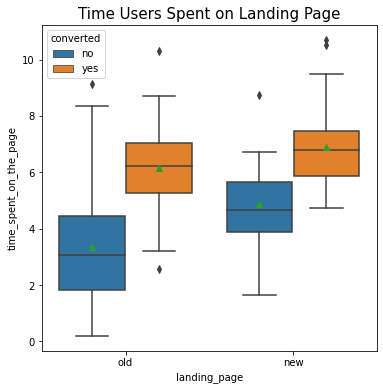

In [120]:
# mean of 'time_spent_on_the_page' on old or new 'landing_page' as a factor
print(round(df.groupby('landing_page')['time_spent_on_the_page'].mean(),2))

# to create the boxplot for visualization 
fig, ax = plt.subplots(figsize = (6,6))
a = sns.boxplot(x= 'landing_page', y = 'time_spent_on_the_page', showmeans=True, data=df, hue = 'converted')
a.set_title('Time Users Spent on Landing Page', fontsize=15)
plt.show()

Observations:
* The sample visitors, from a control group (old landing page), who became subscribers spent ~6 minutes on average.
* The sample visitors, from a treatment group (new landing page), who became subscribers spent ~7 minutes on average.
* On average users on the new landing page spent more time on the page before decided to subscribe to the E-news

language_preferred
English    5.56
French     5.25
Spanish    5.33
Name: time_spent_on_the_page, dtype: float64


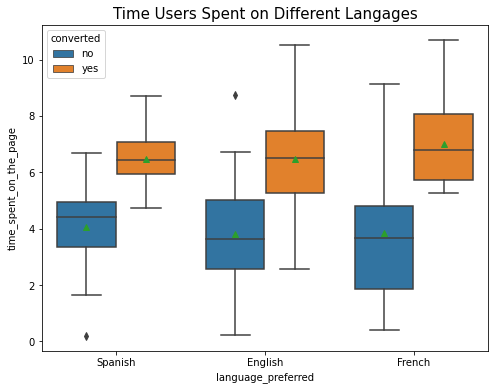

In [122]:
# mean of 'time_spent_on_the_page' on 'language_preferred' as a factor
print(round(df.groupby('language_preferred')['time_spent_on_the_page'].mean(),2))

# to create the boxplot for visualization 
fig, ax = plt.subplots(figsize = (8,6))
a = sns.boxplot(x= 'language_preferred', y = 'time_spent_on_the_page', showmeans=True, data=df, hue = 'converted')
a.set_title('Time Users Spent on Different Langages', fontsize=15)
plt.show()

Observations:
* Users, who became subscribers, spent time on a landing page on average aproximately close for those three languages.
* A few outlinders

### Q2: Do the users spend more time on the new landing page than the old landing page?

* 'landing_page' is a categorical variable and 'time_spent_on_the_page' is numeral variable.

* We want to know if the users spent more time on the new landing page.

Let $\mu_n, \mu_o$ be the means of time spent on **the new landing page** and **the old landing page** groups respectively.

>$H_0:\mu_n=\mu_o$

against the alternate hypothesis

>$H_a:\mu_n>\mu_o$

In [123]:
# to get the mean and std of time users spent on the new landing page
time_new = df[df['landing_page']=='new']
mu_n = round(time_new['time_spent_on_the_page'].mean(),2)
sigma_n = round(time_new['time_spent_on_the_page'].std(),2)
print('The mean of time users spent on the new landing page is {0} minutes'.format(mu_n))
print('The standard division of time users spent on the new landing page is {0} minutes'.format(sigma_n))

# to get the mean and std of time users spent on the old landing page
time_old = df[df['landing_page']=='old']
mu_o = round(time_old['time_spent_on_the_page'].mean(),2)
sigma_o = round(time_old['time_spent_on_the_page'].std(),2)
print('The mean of time users spent on the old landing page is {0} minutes'.format(mu_o))
print('The standard division of time users spent on the old landing page is {0} minutes'.format(sigma_o))

The mean of time users spent on the new landing page is 6.22 minutes
The standard division of time users spent on the new landing page is 1.82 minutes
The mean of time users spent on the old landing page is 4.53 minutes
The standard division of time users spent on the old landing page is 2.58 minutes


### Let's test whether the T-test assumptions are satisfied or not

* Continuous data - Yes, time is measured on a continuous scale.
* #####NOT SURE####Normally distributed populations - Yes, we are informed that the populations are assumed to be normal.
* Independent populations - We are taking random samples for two different groups; users who received a new landing page and users who received an old landing page. Thus,the two samples are from two independent populations.
* Unequal population standard deviations - Since the sample standard deviations are different (1.82 and 2.58), we will assumed that the population standard deviations are different.
* Random sampling from the population - Yes, it states that this is a random sampling of 100 users, dividing them to 2 groups.

Since conditions are satisfied, we are using two sample T-test for this problem. We will use one-sided, 2-sample independent t-test.

In [139]:
time_new.head() # to check time_new dataframe

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
4,546459,treatment,new,4.75,yes,Spanish
6,546448,treatment,new,5.25,yes,French
8,546461,treatment,new,10.71,yes,French


In [140]:
time_old.head() #to check time_old dataframe

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
3,546567,control,old,3.02,no,French
5,546558,control,old,5.28,yes,English
7,546581,control,old,6.53,yes,Spanish
9,546548,control,old,2.08,no,English


In [143]:
#import the required functions
from scipy.stats import ttest_ind

# find the p-value
test_stat, p_value = ttest_ind(time_new['time_spent_on_the_page'], time_old['time_spent_on_the_page'], equal_var = False, alternative = 'greater')
print('The p-value is ', p_value)

The p-value is  0.0001392381225166549


### Insight
Since the p-value 0.0001 is much less than 0.05, the level of significace, we reject the null hypothesis and conclude that the users spend more time on the new landing page than the old landing page.

### Q3: Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

* 'landing_page' and 'language_preperred' are categorical variables.
* We want to see if the proportion of the conversion rate for the new landing page is greater than the conversion rate for the old page.


* Conversion rate: 
    * $CR_n$ = old landing samples/ new landing page converted
    * $CR_o$ = old landing samples/ new landing page converted
    
We will test the null hypothesis

>* $H_0$ : The conversion rate of the new landing page is equal to the old land page.

against the alternate hypothesis

>* $H_a$ : The conversion rate of the new landing page is greater than to the old land page.

### Test whether the Z-test assumptions are satisfied or not

*   Binomally distributed population - Yes, the landing page choice is either the old landing page or the new landing page.
*   Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.  
*   Can the binomial distribution approximated to normal distribution - Yes. For binary data, CLT works slower than usual. The standard thing is to check whether np and n(1-p) are greater than or equal to 10. Here, n and p refer to the sample size and sample proportion respectively.
>$nCR_n = 50\cdot \frac{33}{50} = 33 \geq 10\\
n(1-CR_n) = 50 \cdot \frac{50-33}{50} =17 \geq 10 \\
nCR_o = 50\cdot \frac{21}{50} =21 \geq 10\\
n(1-CR_o) = 50 \cdot \frac{50-21}{50} =29 \geq 10 $

We will use proportions 2-sample z-test to find p-value

In [142]:
# import the required fuction
from statsmodels.stats.proportion import proportions_ztest

# number of conversion for both landing page
con = np.array([33, 21])

# number for both sample sizes
sample = np.array([50, 50])

# find the p-value
test_stat, p_value = proportions_ztest(con, sample)
print('The p-value is ' + str(p_value))

The p-value is 0.016052616408112556


### Insight

As the p-value 0.0161 is less than the significance level 0.05, we reject the null hypothesis. Thus, the convension rate for the new landing page is greater than the conversion rate for the old landing page.

### Q4: Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]


### Data preperation

In [130]:
converted_language = pd.crosstab(df['converted'], df['language_preferred'], margins = True, margins_name = 'total')
converted_language

language_preferred,English,French,Spanish,total
converted,,,,
no,11,19,16,46
yes,21,15,18,54
total,32,34,34,100


### the null and alternative hypothesis


We will test the null hypothesis

>$H_0:$ The converted status is independent of the preferred language.

against the alternate hypothesis

>$H_a:$ The converted status depends of the preferred language.

### Test whether the assumptions are satisfied or not

* Categorical variables - Yes
* Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

We will use Chi-Square Test of Independance to check if the converted status depend on the preferred language.

In [131]:
# import the required function
from scipy.stats import chi2_contingency

# find the p-value
chi, p_value, dof, expected = chi2_contingency(con_lang)
print('The p-value is', p_value)

The p-value is 0.7970832186581233


### Insight
As the p-value 0.7971 is much more than the significance level 0.05, we fail to reject the null hypothesis. Hence, we do not have enough statistical significance to conclude that the converted status is independent of the preferred language at 5% significance level.

### Q5: Is the mean time spent on the new page same for the different language users?


### Data Preperation

In [160]:
# to find means of time users spent on the new landing pages in Spanish, French, and English respectively.
df_l = df[(df['landing_page']=='new')]
print(df_l.groupby('language_preferred')['time_spent_on_the_page'].mean())

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64


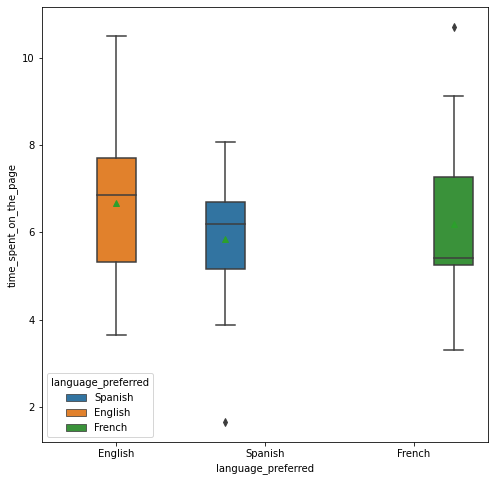

In [161]:
# visual analysis of the time users spending on the two landing pages.
fig, ax = plt.subplots(figsize = (8,8)) #resize the graph
sns.boxplot(data = df_l, x="language_preferred", y="time_spent_on_the_page", 
            hue=df['language_preferred'], showmeans=True)
plt.show()

### The null and alternative hypothesis

Let $\mu_s, \mu_f, \mu_e$ be the means of time users spent on landing pages in Spanish, French, and English respectively.

We will test the null hypothesis

>$H_0: \mu_s = \mu_f = \mu_e$

against the alternative hypothesis

>$H_a: $ At least one mean of time users spent per a language is different from the rest.

Using ANOVA Test
Here, time_spent_on_the_page is the response and language_preferred is the factor.

We need to check the normality and equality of variance assumptions.

* For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

* For equality of variance, Levene test is applied to the response variable.

#### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ The time spent on the landing page follows a normal distribution against

against the alternative hypothesis

>$H_a:$ The time spent on the landing page does not follow a normal distribution

In [162]:
# Assumption 1: Normality
# import the required function
from scipy import stats

# find the p-value
w, p_value = stats.shapiro(df_l['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.8040016293525696


Since p_value 0.8040 is much greater than 0.05, we fail to reject the null hypothesis that the response follows the normal distribution.

### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [168]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_value = levene( df_l['time_spent_on_the_page'][df_l['language_preferred']=="Spanish"], 
                                   df_l['time_spent_on_the_page'][df_l['language_preferred']=="French"], 
                                   df_l['time_spent_on_the_page'][df_l['language_preferred']=="English"])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.46711357711340173


Since p_value 0.4671 is much greater than 0.05, we fail to reject the null hypothesis that the population variances are equal.

### Test whether the assumptions are satisfied or not
* The populations are normally distributed - Yes, the normality assumption is verified using the Shapiro-Wilk’s test.
* Samples are independent simple random samples - Yes, we are informed that the collected sample is a simple random sample.
* Population variances are equal - Yes, the homogeneity of variance assumption is verified using the Levene's test.

### The P-Value

In [170]:
#import the required function
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(df_l.loc[df_l['language_preferred'] == 'Spanish', 'time_spent_on_the_page'],
                              df_l.loc[df_l['language_preferred'] == 'French', 'time_spent_on_the_page'],
                              df_l.loc[df_l['language_preferred'] == 'English', 'time_spent_on_the_page'])
print('The p-value is ' + str(p_value))

The p-value is 0.43204138694325955


### Insight
As the p-value 0.4320 is much more than the significance level 0.05, we fail to reject the null hypothesis. Hence, we do not have enough statistical significance to conclude that the mean time spent on the new page same for the different language user.